In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras

In [2]:
wine = pd.read_csv("archives/winequality-red.csv")

In [3]:
X = wine.drop("quality", axis=1)
y = wine["quality"]

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [7]:
X_train.shape

(899, 11)

In [8]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(11,)),
    # keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(18, activation="relu", name="Activation_layer"),
    keras.layers.Dense(6, name="Output_layer")
], name="modelito")
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.001),
              loss="mean_squared_error")

model.summary()

Model: "modelito"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Activation_layer (Dense)        │ (None, 18)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 6)              │           114 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330 (1.29 KB)

 Trainable params: 330 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.7567 - val_loss: 30.8994
Epoch 2/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3228 - val_loss: 28.4484
Epoch 3/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.0729 - val_loss: 26.1590
Epoch 4/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9327 - val_loss: 23.9605
Epoch 5/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8498 - val_loss: 21.8259
Epoch 6/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7984 - val_loss: 19.7265
Epoch 7/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7670 - val_loss: 17.6707
Epoch 8/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7660 - val_loss: 15.6732
Epoch 9/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8083 - val_loss: 13.7551
Epoch 10/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.9190 - val_loss: 11.9403
Epoch 11/10000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1247 - val_loss: 10.2617
Epoch 12/10000
29/2

<Axes: >

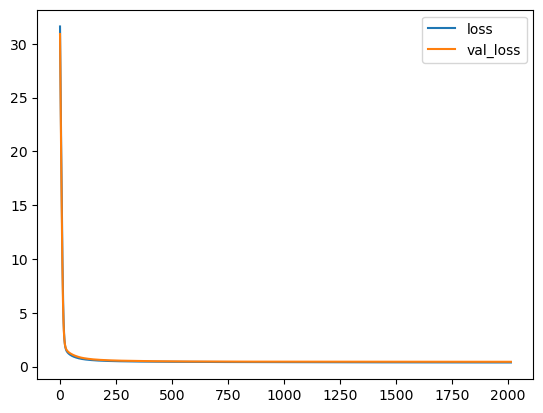

In [10]:
df = pd.DataFrame(history.history)
df.plot()

In [11]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4058  


0.38355308771133423

In [12]:
model.save("model/modelito.keras")

In [13]:
X_nueva = X_test[:5]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[5.4354296, 5.4215364, 5.433216 , 5.4406776, 5.381806 , 5.4142284],
       [5.0317507, 5.161262 , 5.049657 , 5.1435523, 5.2547975, 5.0726123],
       [5.451356 , 5.494819 , 5.3794527, 5.368271 , 5.4455576, 5.4264617],
       [5.610901 , 5.476236 , 5.5331554, 5.4337473, 5.506099 , 5.5205045],
       [5.8560715, 5.848299 , 5.8353243, 5.788364 , 5.9104443, 5.8155546]],
      dtype=float32)

In [14]:
y_test[:5]

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64